<a href="https://colab.research.google.com/github/harshithma/pyhon/blob/main/2nd_Commit_EDA_Telecom_Churn_Analysis__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Telecom Churn Analysis**



##### **Project Type**    - Exploratory data analysis
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW

Telecom companies need to retain existing customers because it costs more to add new customers hence to prevent loss the company analyse churn data to target customers who are likely to churn based on previously observed key factors,affecting variables and insights so as to retain them from possible churn.






#### **Define Your Business Objective?**

**Reducing Customer Churn Rate** by identifying affecting variables and insights.

# **General Guidelines** : -  


The process start by getting general information on data set followed by wrangling ,Relating variables & visualization

 Univariate Analysis

 Bivariate Analysis (Numerical - Categorical, Numerical - Numerical,Categorical - Categorical)

 M - Multivariate Analysis








# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt


### Dataset Loading

In [ ]:
from google.colab import files

# Use the files.upload() method to upload a CSV file
uploaded = files.upload()



Saving Telecom Churn.csv to Telecom Churn.csv


In [ ]:
file_name=list(uploaded.keys())[0]

In [ ]:
# Importing the dataset
df=pd.read_csv(io.BytesIO(uploaded[file_name]))

### Dataset First View

In [ ]:
# Dataset refered as df
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns
df.shape

(3333, 20)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [ ]:
# Editing column name with underscore for usage in code
df.columns=map(lambda columns:'_'.join(columns.split()),df.columns)

In [ ]:
# Preview sample values frequency
df.Area_code.value_counts()


415    1655
510     840
408     838
Name: Area_code, dtype: int64

In [ ]:
df.Account_length.value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: Account_length, Length: 212, dtype: int64

<Axes: >

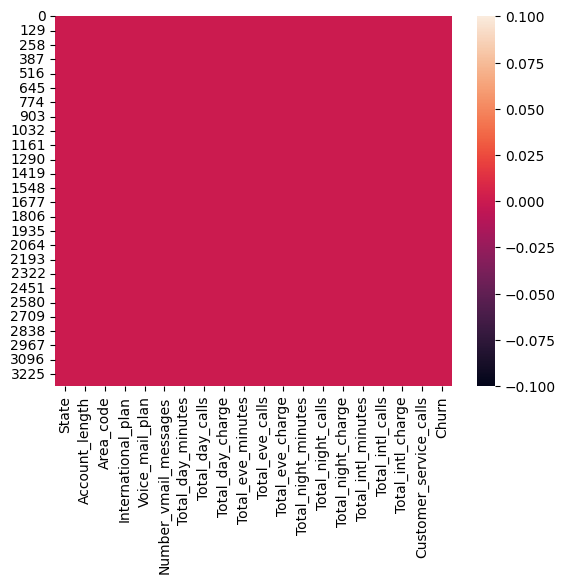

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=True)

### What did you know about your dataset?

The dataset given is a dataset from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 3333 rows and 20 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe
df.describe()

,Account_length,Area_code,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Dataset Columns
df.columns


Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')

### Variables Description

* **State                :**categorica for the 50 states

* **Account_Length       :**how long account has been active

* **Area_Code            :**Code Number of Area having some States included in each area code

* **International_plan            :**Internat ional plan activated ( yes, no )

* **Voice_mail_Plan           :**  ice Mail plan activated ( yes ,no )

* **Number_vmail_Messages        :**No.of voice mail messages

* **Total_day_Mins             :**Total day minutes used

* **Total_day_calls**         :Total day calls made

* **Total_day_Charge**         :Total day charge

* **Total_eve_mins**          :Total evening minutes

* **Total_eve_calls**          :Total evening calls

* **Total_eve_charge**         :Total evening charge

* **Total_night_mins**         :Total night minutes

* **Total_night_calls**        :Total night calls

* **Total_night_charge**      :Total night charge

* **Total_intl_mins**         :Total International minutes used

* **Total_intl_calls**         :Total International calls made

* **Total_intl_charge**        :Total International charge

* **Customer_service_calls**    :Number of customer service calls made

* **Churn**             :Customer churn (Target Variable True=1, False=0)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist() :
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  State is 51 .
No. of unique values in  Account_length is 212 .
No. of unique values in  Area_code is 3 .
No. of unique values in  International_plan is 2 .
No. of unique values in  Voice_mail_plan is 2 .
No. of unique values in  Number_vmail_messages is 46 .
No. of unique values in  Total_day_minutes is 1667 .
No. of unique values in  Total_day_calls is 119 .
No. of unique values in  Total_day_charge is 1667 .
No. of unique values in  Total_eve_minutes is 1611 .
No. of unique values in  Total_eve_calls is 123 .
No. of unique values in  Total_eve_charge is 1440 .
No. of unique values in  Total_night_minutes is 1591 .
No. of unique values in  Total_night_calls is 120 .
No. of unique values in  Total_night_charge is 933 .
No. of unique values in  Total_intl_minutes is 162 .
No. of unique values in  Total_intl_calls is 21 .
No. of unique values in  Total_intl_charge is 162 .
No. of unique values in  Customer_service_calls is 10 .
No. of unique values in  Churn is 2

### Verify the unique datatype of each column

In [ ]:
flag = 0

for column in df.columns:
    if df[column].apply(type).nunique() > 1:
        print(column,flag)
        flag = 1
        break
print(flag) # Value 0 indicates the values of a particular column are of same datatype

0


### Clssifying the variables as discrete and continous comparitivley to each other columns

In [ ]:
#Categorical Variable
df.Area_code.value_counts()



415    1655
510     840
408     838
Name: Area_code, dtype: int64

In [ ]:
#Continous Variable
df.Account_length.value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: Account_length, Length: 212, dtype: int64

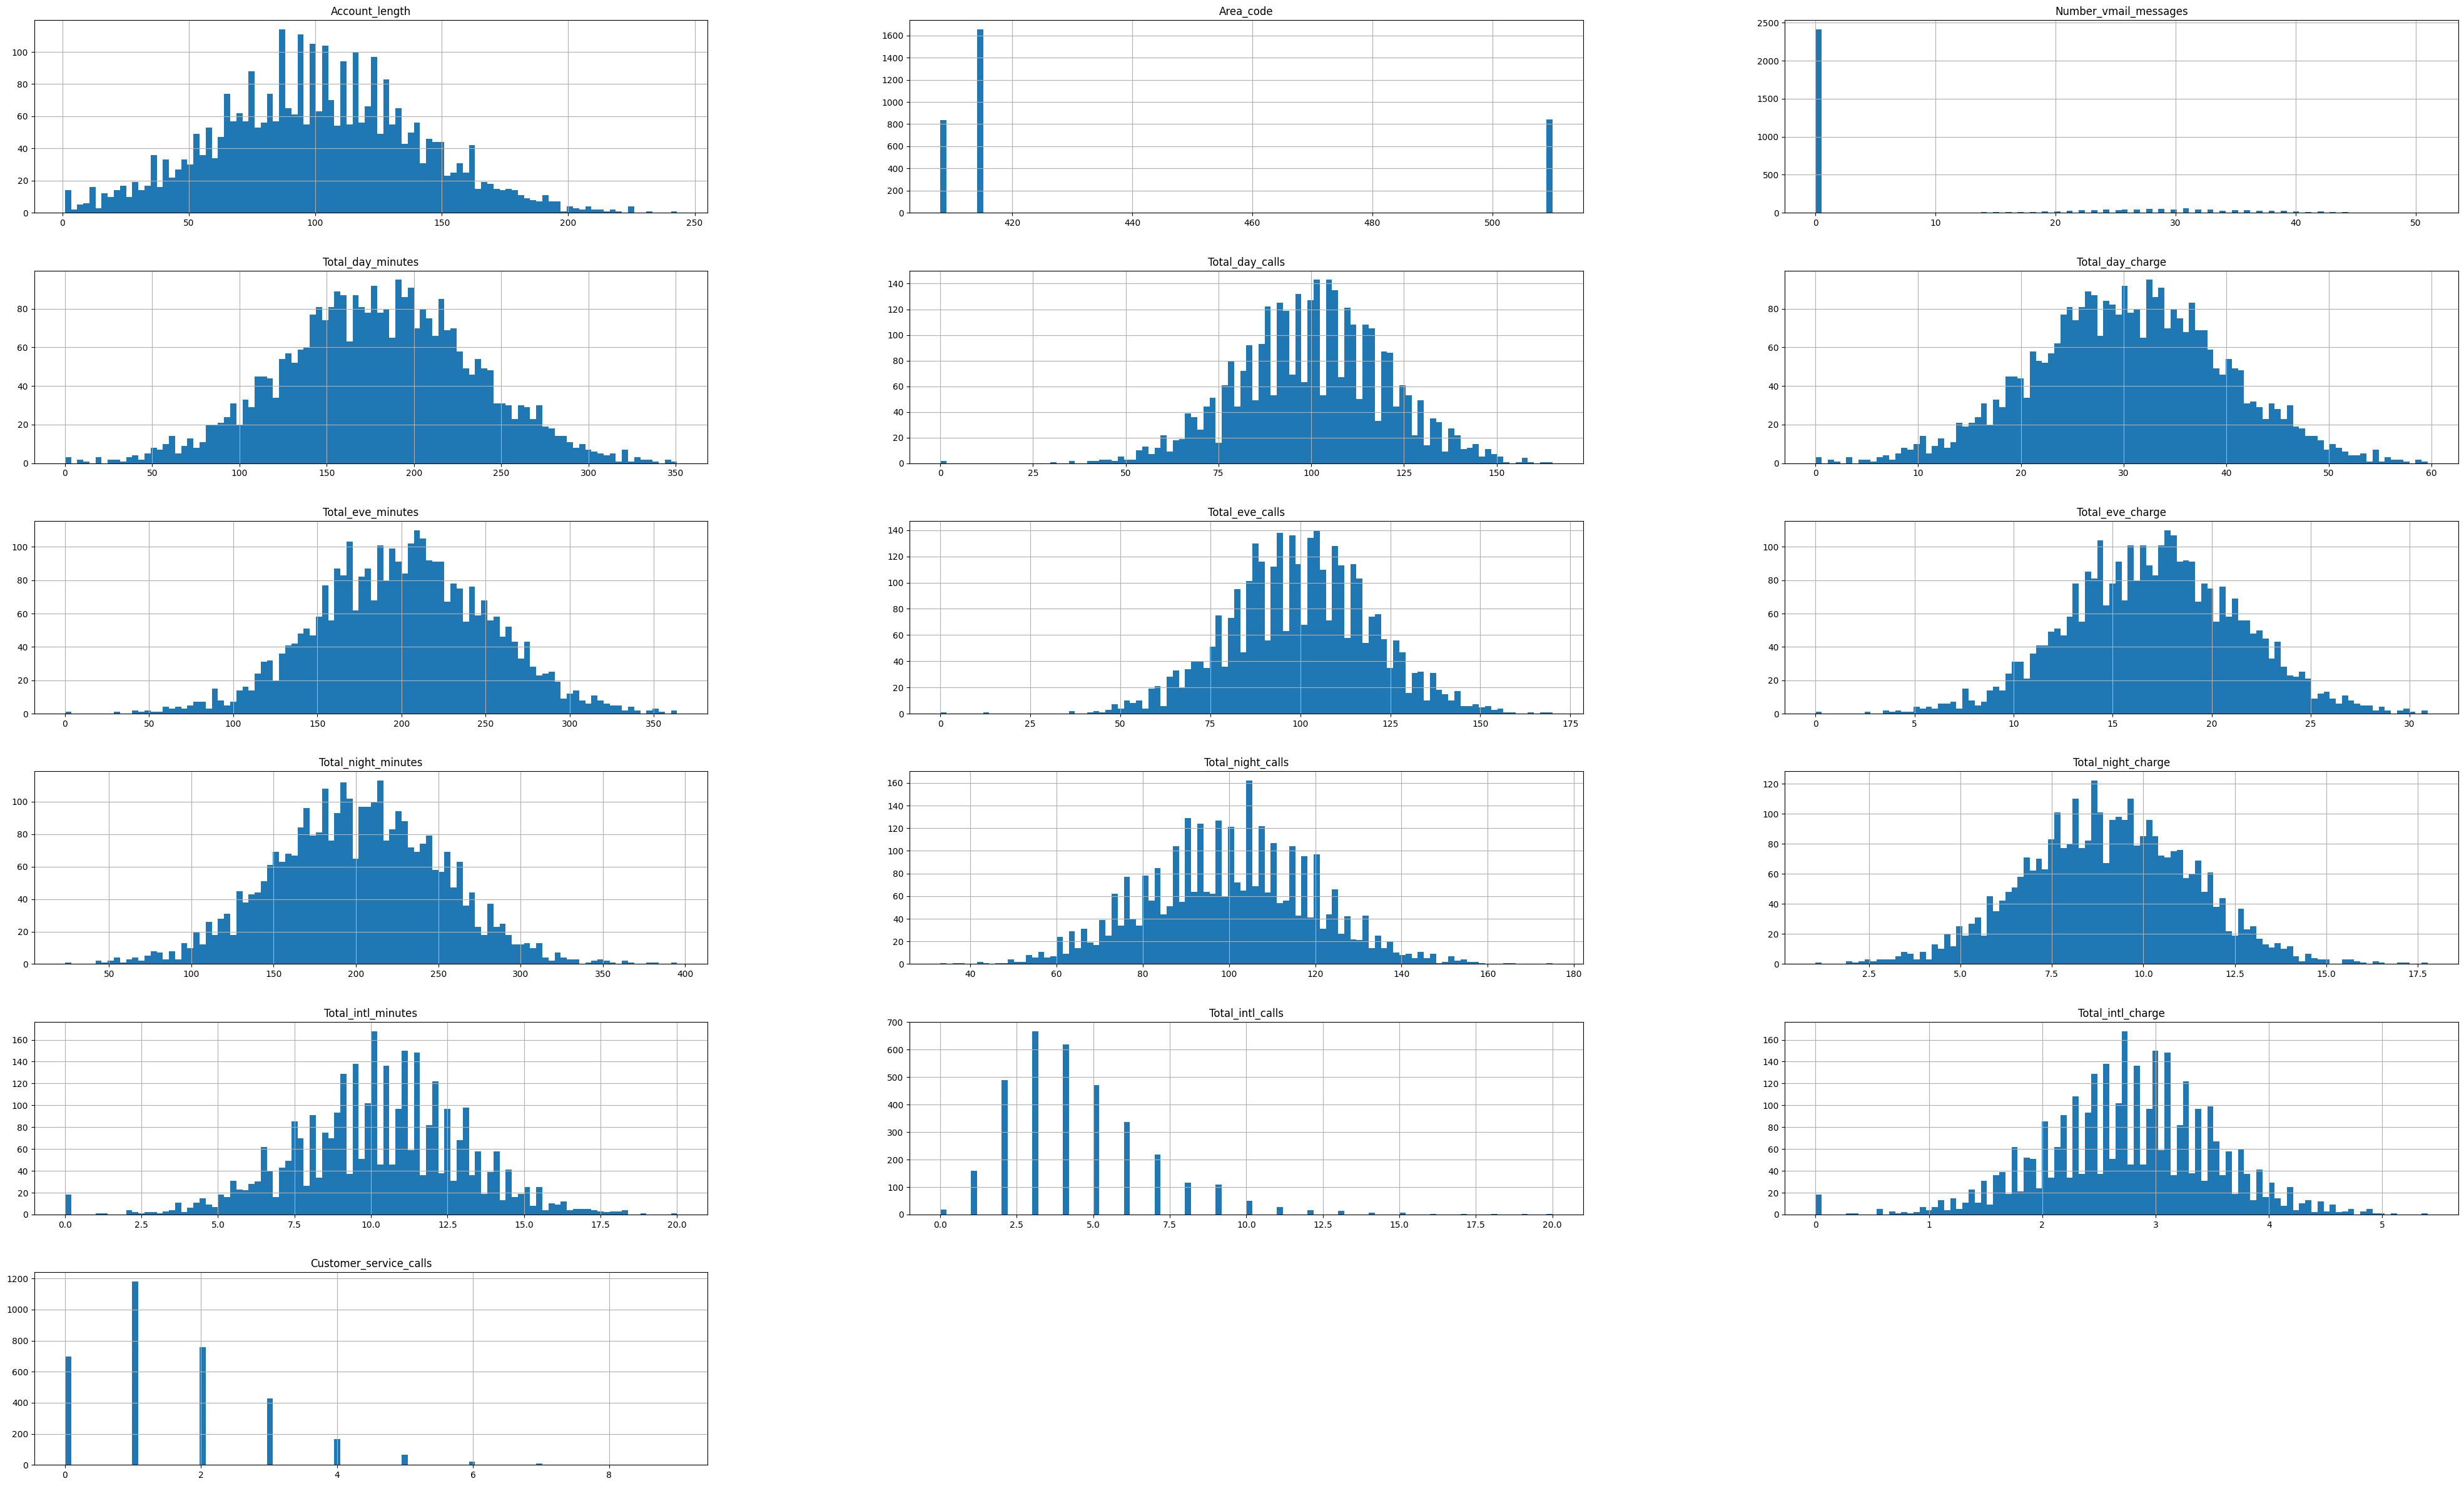

In [ ]:
#Using visualisation to know the variable distibution
#Using visualisation to know the variable distibution
df.hist(bins=100, figsize=(50, 30), layout=(6,3))  # Adjust layout based on the number of columns
plt.show()

In [ ]:
#discrete
df.Customer_service_calls.value_counts()


1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer_service_calls, dtype: int64

In [ ]:
#discrete
df.Total_intl_calls.value_counts()

3     668
4     619
2     489
5     472
6     336
7     218
1     160
8     116
9     109
10     50
11     28
0      18
12     15
13     14
15      7
14      6
18      3
16      2
19      1
20      1
17      1
Name: Total_intl_calls, dtype: int64

In [ ]:
#discrete
df.Number_vmail_messages.value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number_vmail_messages, dtype: int64

In [ ]:
df.State.value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_length          3333 non-null   int64  
 2   Area_code               3333 non-null   int64  
 3   International_plan      3333 non-null   object 
 4   Voice_mail_plan         3333 non-null   object 
 5   Number_vmail_messages   3333 non-null   int64  
 6   Total_day_minutes       3333 non-null   float64
 7   Total_day_calls         3333 non-null   int64  
 8   Total_day_charge        3333 non-null   float64
 9   Total_eve_minutes       3333 non-null   float64
 10  Total_eve_calls         3333 non-null   int64  
 11  Total_eve_charge        3333 non-null   float64
 12  Total_night_minutes     3333 non-null   float64
 13  Total_night_calls       3333 non-null   int64  
 14  Total_night_charge      3333 non-null   

<Axes: >

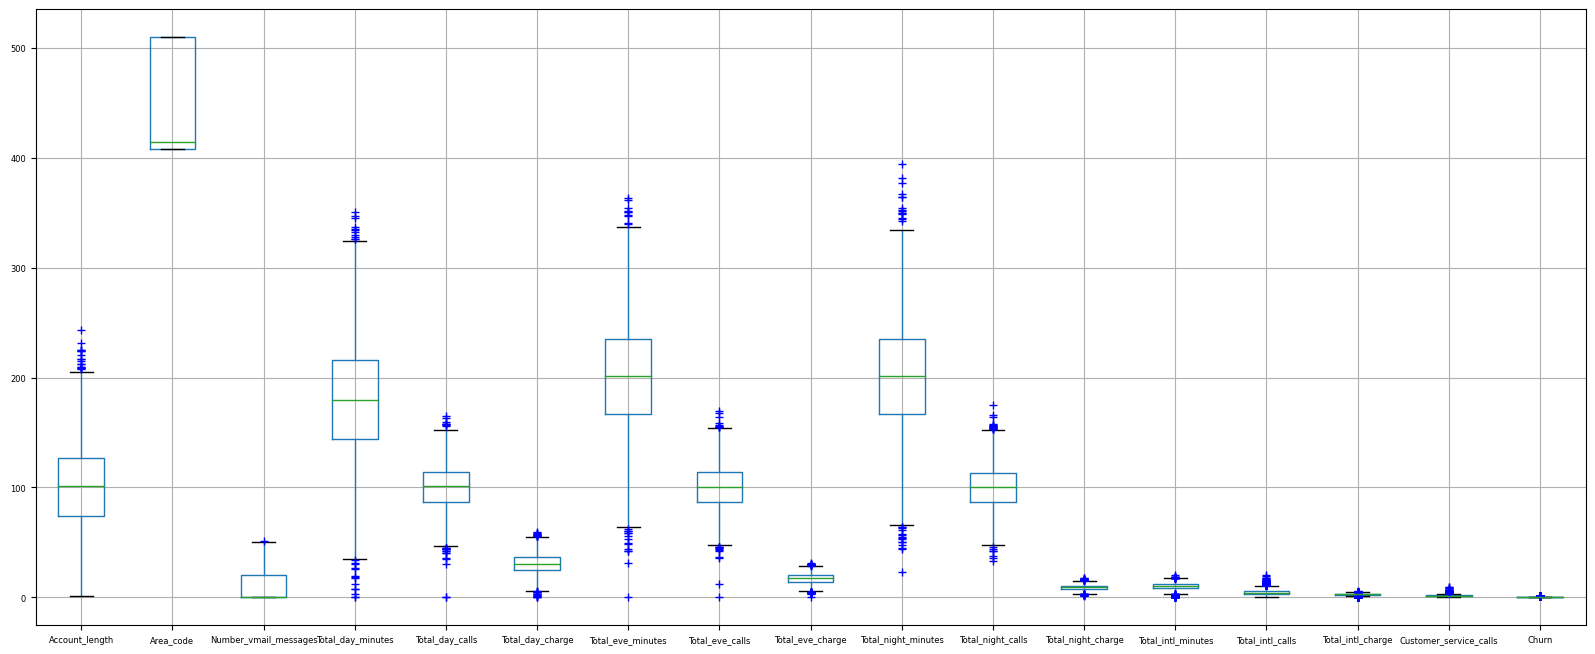

In [ ]:
df.boxplot(
    column=None,       # Specify the column(s) to plot. If not specified, box plots will be created for all numeric columns.
    by=None,           # Create separate box plots for each group defined by this column.
    ax=None,           # Matplotlib axis object to draw the plot onto.
    fontsize=6,     # Font size for the title and labels.
    rot=0,             # Rotation angle of category labels (x-axis labels).
    grid=True,         # Whether to display grid lines.
    figsize=(20,8),     # Size of the figure (width, height) in inches.
    layout=None,       # Tuple (rows, columns) for the layout of subplots when using 'by'.
    return_type=None,  # Type of object to return. 'axes' returns a Matplotlib axes object, 'dict' returns a dictionary.
    patch_artist=False, # If True, boxes are drawn with filled patches.
    notch=False,       # If True, will produce a notched box plot.
    sym='b+',          # Symbol to use for flier points (outliers).
    vert=True)

<Axes: >

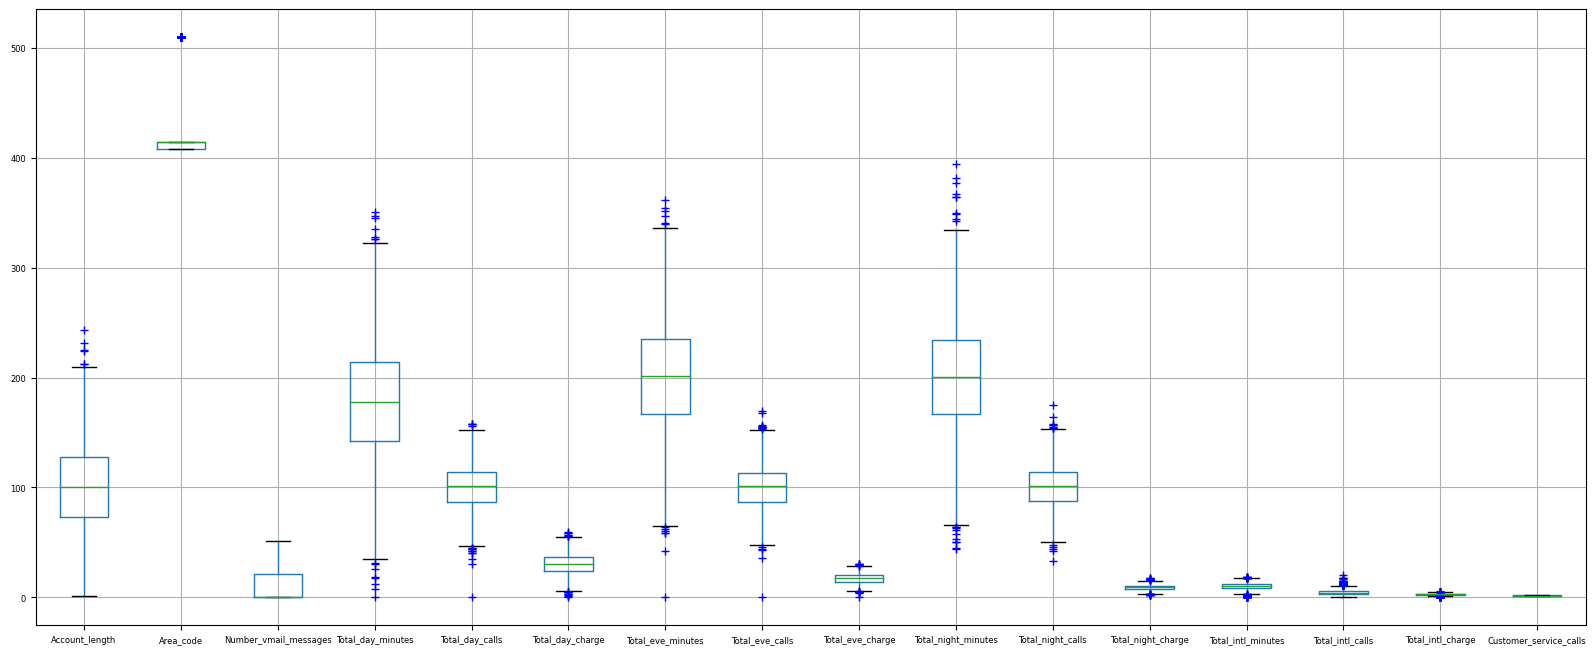

In [ ]:
df_1.boxplot(
    column=None,       # Specify the column(s) to plot. If not specified, box plots will be created for all numeric columns.
    by=None,           # Create separate box plots for each group defined by this column.
    ax=None,           # Matplotlib axis object to draw the plot onto.
    fontsize=6,     # Font size for the title and labels.
    rot=0,             # Rotation angle of category labels (x-axis labels).
    grid=True,         # Whether to display grid lines.
    figsize=(20,8),     # Size of the figure (width, height) in inches.
    layout=None,       # Tuple (rows, columns) for the layout of subplots when using 'by'.
    return_type=None,  # Type of object to return. 'axes' returns a Matplotlib axes object, 'dict' returns a dictionary.
    patch_artist=False, # If True, boxes are drawn with filled patches.
    notch=False,       # If True, will produce a notched box plot.
    sym='b+',          # Symbol to use for flier points (outliers).
    vert=True)

>We can see the blue fringes are thinner after removing outliers using IQR method when compared to original one which has thick blue fringes

#

Identifying the type of variables